# Trabalho de Motores

In [1]:
import pandas as pd
import numpy as np
import locale
import math
import matplotlib.pyplot as plt

from uncertainties import ufloat as u
from uncertainties import unumpy as un

locale.setlocale(locale.LC_ALL, 'pt_BR')
%matplotlib widget
plt.style.use('duarte')
MARKER='.'

## 1. Ensaio de Fluxo

In [2]:
ge = pd.read_excel(io='dados.xlsx',
                   sheet_name='geometria',
                   header=[0,1])
display(ge)
display(ge.describe())

escape                   admissao                 
  d_valvula h_valvula  d_int d_valvula h_valvula  d_int
0     24.88      4.93  20.48     28.44      5.10  24.60
1     25.10      4.90  19.85     28.40      5.00  24.35
2     24.90      4.90  20.50     28.45      4.95  24.40
3     24.47      5.00    NaN     28.00      5.00    NaN

escape                        admissao                     
      d_valvula h_valvula      d_int  d_valvula h_valvula      d_int
count   4.00000   4.00000   3.000000   4.000000  4.000000   3.000000
mean   24.83750   4.93250  20.276667  28.322500  5.012500  24.450000
std     0.26437   0.04717   0.369639   0.216083  0.062915   0.132288
min    24.47000   4.90000  19.850000  28.000000  4.950000  24.350000
25%    24.77750   4.90000  20.165000  28.300000  4.987500  24.375000
50%    24.89000   4.91500  20.480000  28.420000  5.000000  24.400000
75%    24.95000   4.94750  20.490000  28.442500  5.025000  24.500000
max    25.10000   5.00000  20.500000  28.450000  5.100000  24.600000

In [3]:
ef = pd.read_excel('ensaio_fluxo.xlsx',
                   header=[0,1])
ef.head()

ava                     eve                     eva                
  pressao abertura  fluxo pressao abertura  fluxo pressao abertura  fluxo
0   25.00        0   0.00   25.00        0   0.00   25.00        0   0.00
1   25.03        1  29.11   25.01        1  25.97   25.01        1  24.12
2   25.03        2  54.12   25.02        2  53.92   25.01        2  49.43
3   25.02        3  74.55   25.02        3  75.77   25.02        3  72.81
4   25.04        4  87.17   25.01        4  91.36   25.02        4  87.03

In [4]:
print(ef.style.format(precision=2,
                      decimal=',',
                      thousands='.').to_latex())

\begin{tabular}{lrrrrrrrrr}
 & \multicolumn{3}{r}{ava} & \multicolumn{3}{r}{eve} & \multicolumn{3}{r}{eva} \\
 & pressao & abertura & fluxo & pressao & abertura & fluxo & pressao & abertura & fluxo \\
0 & 25,00 & 0 & 0,00 & 25,00 & 0 & 0,00 & 25,00 & 0 & 0,00 \\
1 & 25,03 & 1 & 29,11 & 25,01 & 1 & 25,97 & 25,01 & 1 & 24,12 \\
2 & 25,03 & 2 & 54,12 & 25,02 & 2 & 53,92 & 25,01 & 2 & 49,43 \\
3 & 25,02 & 3 & 74,55 & 25,02 & 3 & 75,77 & 25,02 & 3 & 72,81 \\
4 & 25,04 & 4 & 87,17 & 25,01 & 4 & 91,36 & 25,02 & 4 & 87,03 \\
5 & 25,03 & 5 & 94,37 & 25,02 & 5 & 105,32 & 25,02 & 5 & 92,68 \\
6 & 25,04 & 6 & 98,87 & 25,04 & 6 & 115,26 & 25,02 & 6 & 94,28 \\
7 & 25,04 & 7 & 101,04 & 25,03 & 7 & 119,16 & 25,02 & 7 & 95,16 \\
8 & 25,02 & 8 & 102,35 & 25,02 & 8 & 120,74 & 25,02 & 8 & 95,86 \\
9 & 24,99 & 9 & 103,70 & 24,92 & 9 & 121,74 & 25,02 & 9 & 96,33 \\
10 & 25,01 & 10 & 104,07 & 25,04 & 10 & 121,68 & 25,01 & 10 & 96,74 \\
\end{tabular}



In [5]:
print(ge.style.format(precision=2,
                      decimal=',',
                      thousands='.').to_latex())

\begin{tabular}{lrrrrrr}
 & \multicolumn{3}{r}{escape} & \multicolumn{3}{r}{admissao} \\
 & d_valvula & h_valvula & d_int & d_valvula & h_valvula & d_int \\
0 & 24,88 & 4,93 & 20,48 & 28,44 & 5,10 & 24,60 \\
1 & 25,10 & 4,90 & 19,85 & 28,40 & 5,00 & 24,35 \\
2 & 24,90 & 4,90 & 20,50 & 28,45 & 4,95 & 24,40 \\
3 & 24,47 & 5,00 & nan & 28,00 & 5,00 & nan \\
\end{tabular}



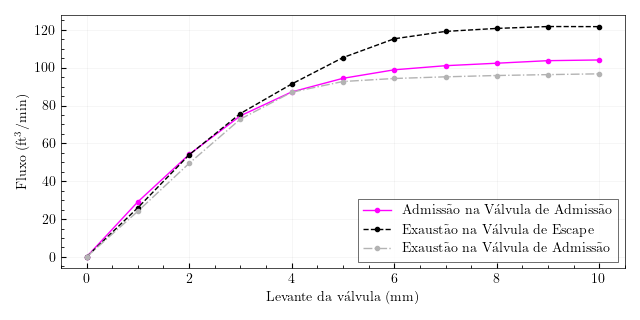

In [6]:
cm = 1/2.5
levante = np.arange(0,11,1) * 1e-3 # m

fig, ax = plt.subplots(figsize=(16*cm, 8*cm))

ax.plot(levante * 1e3, 
            ef.ava.fluxo, 
            label='Admissão na Válvula de Admissão',
            marker=MARKER)
ax.plot(levante * 1e3, 
            ef.eve.fluxo, 
            label='Exaustão na Válvula de Escape',
            marker=MARKER)
ax.plot(levante * 1e3, 
            ef.eva.fluxo, 
            label='Exaustão na Válvula de Admissão',
            marker=MARKER)
ax.legend()
ax.set_xlabel('Levante da válvula (mm)')
ax.set_ylabel('Fluxo (ft$^3$/min)')

fig.tight_layout()
fig.savefig('../figuras/levante_fluxo.pgf',
            backend='pgf')

In [7]:
# HIPERPARAMETROS
D_VAL_E = ge.describe().loc['mean'].loc['escape'].loc['d_valvula'] * 1e-3   # m
D_VAL_A = ge.describe().loc['mean'].loc['admissao'].loc['d_valvula'] * 1e-3 # m
H_VAL_E = ge.describe().loc['mean'].loc['escape'].loc['h_valvula'] * 1e-3   # m
H_VAL_A = ge.describe().loc['mean'].loc['admissao'].loc['h_valvula'] * 1e-3 # m
D_GARG_E = ge.describe().loc['mean'].loc['escape'].loc['d_int'] * 1e-3      # m
D_GARG_A = ge.describe().loc['mean'].loc['admissao'].loc['d_int'] * 1e-3    # m

P_ENSAIO = 25 * 249     # Pa
P0 = 96.3 * 1e3         # Pa
T0 = 25.8 + 273.15      # K

### 1.1 Áreas

#### 1.1.1 Área de cortina $\times$ Levante das válvulas

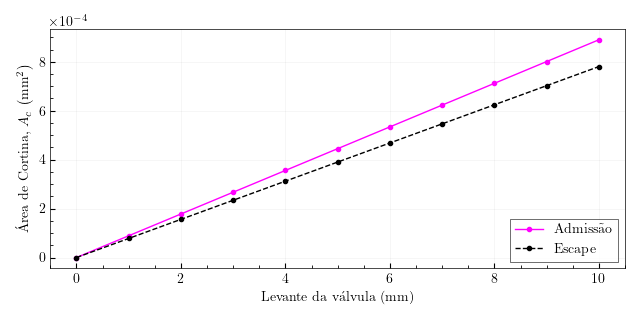

In [8]:
# AREA DE CORTINA
def area_cortina(d_valvula, levante):
    return np.pi * d_valvula * levante

ac_admissao = area_cortina(D_VAL_A, levante)
ac_escape = area_cortina(D_VAL_E, levante)

fig, ax = plt.subplots(figsize=(16*cm, 8*cm))

ax.plot(levante * 1e3, 
           ac_admissao, 
           label='Admissão', 
           marker=MARKER)
ax.plot(levante * 1e3, 
           ac_escape, 
           label='Escape', 
           marker=MARKER)
ax.set_xlabel('Levante da válvula (mm)')
ax.set_ylabel(r'Área de Cortina, $A_c$ $\left(\mathrm{mm}^2\right)$')
ax.legend(loc=4)

fig.tight_layout()
fig.savefig('../figuras/levante_ac.pgf',
            backend='pgf')

#### 1.1.2 Área de garganta

In [9]:
# AREA DE GARGANTA
def area_garganta(d_valvula, d_haste):
    return np.pi/4 * (d_valvula**2 - d_haste**2)

ag_admissao = area_garganta(D_VAL_A, H_VAL_A)
ag_escape = area_garganta(D_VAL_E, H_VAL_E)

print(f'Área de garganta na admissão: {ag_admissao:.6f} m2')
print(f'Área de garganta no escape: {ag_escape:.6f} m2')

Área de garganta na admissão: 0.000610 m2
Área de garganta no escape: 0.000465 m2


### 1.2 Coeficiente de descarga ($C_d$)

In [10]:
def rho(P, R, T):
    return P / (R*T)

def vth(P0, rho0, deltaP, gamma=1.4):
    rhoS = rho0 * (1-deltaP/P0)**(1/gamma)

    f1 = P0/rhoS
    f2 = (2*gamma) / (gamma - 1)
    f3 = 1 - (1-deltaP/P0)**((gamma-1)/gamma)

    return np.sqrt(f1*f2*f3)

RHO_AR = rho(P = P0 * 1e-3, # kPa
             T = T0,        # K
             R = 0.2870     # kJ/kg*K (Tab. A1 - ÇENGEL)
             )

Vth = vth(P0=P0,
          rho0=RHO_AR,
          deltaP=P_ENSAIO)
print(f'Velocidade teórica de escoamento: {Vth:.0f} m/s')

Velocidade teórica de escoamento: 109 m/s


#### 1.2.1 $C_d$ $\times$ área de garganta

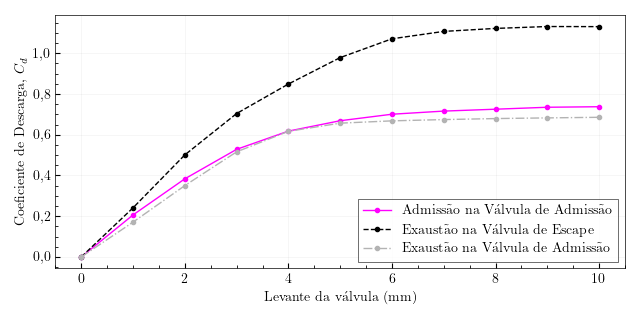

In [11]:
cd_ava_ag = (ef.ava.fluxo) / (Vth * ag_admissao * 2118)
cd_eve_ag = (ef.eve.fluxo) / (Vth * ag_escape * 2118)
cd_eva_ag = (ef.eva.fluxo) / (Vth * ag_admissao * 2118)

fig, ax = plt.subplots(figsize=(16*cm, 8*cm))

ax.plot(levante * 1e3, 
        cd_ava_ag, 
        label='Admissão na Válvula de Admissão', 
        marker=MARKER)
ax.plot(levante * 1e3, 
        cd_eve_ag, 
        label='Exaustão na Válvula de Escape', 
        marker=MARKER)
ax.plot(levante * 1e3, 
        cd_eva_ag, 
        label='Exaustão na Válvula de Admissão', 
        marker=MARKER)
ax.set_xlabel('Levante da válvula (mm)')
ax.set_ylabel('Coeficiente de Descarga, $C_d$')
ax.legend()

fig.tight_layout()
fig.savefig('../figuras/levante_cd_ag.pgf',
            backend='pgf')

#### 1.2.1 $C_d$ $\times$ área mínima

In [12]:
amin_ac_adm = ac_admissao[ac_admissao<ag_admissao]
ag_adm = np.full(len(levante)-len(amin_ac_adm), ag_admissao)
amin_adm = np.concatenate((amin_ac_adm, ag_adm))

amin_ac_esc = ac_escape[ac_escape<ag_escape]
ag_esc = np.full(len(levante) -len(amin_ac_esc), ag_admissao)
amin_esc = np.concatenate((amin_ac_esc, ag_esc))

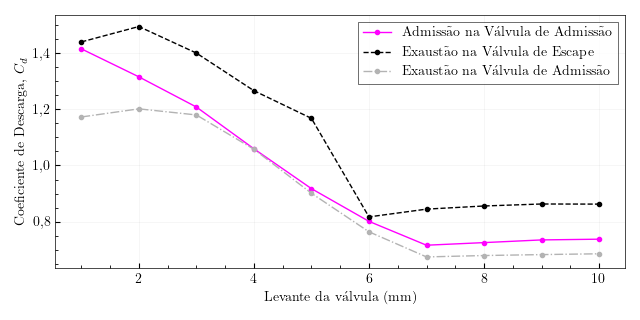

In [13]:
cd_ava_amin = (ef.ava.fluxo) / (Vth * amin_adm * 2118)
cd_eve_amin = (ef.eve.fluxo) / (Vth * amin_esc * 2118)
cd_eva_amin = (ef.eva.fluxo) / (Vth * amin_adm * 2118)

fig, ax = plt.subplots(figsize=(16*cm, 8*cm))

ax.plot(levante * 1e3, 
        cd_ava_amin, 
        label='Admissão na Válvula de Admissão', 
        marker=MARKER)
ax.plot(levante * 1e3, 
        cd_eve_amin, 
        label='Exaustão na Válvula de Escape', 
        marker=MARKER)
ax.plot(levante * 1e3, 
        cd_eva_amin, 
        label='Exaustão na Válvula de Admissão', 
        marker=MARKER)
ax.set_xlabel('Levante da válvula (mm)')
ax.set_ylabel('Coeficiente de Descarga, $C_d$')
ax.legend()

fig.tight_layout()
fig.savefig('../figuras/levante_cd_amin.pgf',
            backend='pgf')

## 2. Ensaio Dinamométrico

In [14]:
ed = pd.read_excel(io='ensaio_din.xlsx',
                   header=[3,4])
ed.head()

,DATA,HORA,HORIM_TOTAL,HORIM_AUTO,NÚMERO_PASSO,NOME_PASSO,OBSERVAÇÃO,CICLO,FC,ROTAÇÃO,...,P_ATM,UMIDADE,T_AMBIENTE,ALFA,RES_4,RES_5,RES_6,RES_7,P_BAROM_AR_SECO,REGISTROS
,DD/MM/AA,HH:MM:SS,HH:MM,HH:MM,Unnamed: 4_level_1,Unnamed: 5_level_1,Unnamed: 6_level_1,Unnamed: 7_level_1,NBR ISO 1585,rpm,...,mbar,%,ºC,%.1,Unnamed: 27_level_1,Unnamed: 28_level_1,Unnamed: 29_level_1,Unnamed: 30_level_1,kPa,Unnamed: 32_level_1
0,2023-11-24,18:21:18,34:36,00:17,2,2200 ESTAB,NaN,0,1.011,2092.06,...,966.22,61.86,29.34,100.03,0,0,0,0,940.97,1
1,2023-11-24,18:21:19,34:36,00:17,2,2200 ESTAB,NaN,0,1.011,2092.94,...,966.17,61.89,29.38,100.03,0,0,0,0,940.91,2
2,2023-11-24,18:21:20,34:36,00:17,2,2200 ESTAB,NaN,0,1.011,2105.44,...,966.22,61.89,29.38,90.40,0,0,0,0,940.91,3
3,2023-11-24,18:21:21,34:36,00:17,2,2200 ESTAB,NaN,0,1.011,2137.44,...,966.22,61.89,29.38,90.40,0,0,0,0,940.91,4
4,2023-11-24,18:21:22,34:36,00:17,2,2200 ESTAB,NaN,0,1.011,2156.83,...,966.17,61.88,29.38,90.40,0,0,0,0,940.86,5


In [15]:
ed.columns

MultiIndex([(           'DATA',            'DD/MM/AA'),
            (           'HORA',            'HH:MM:SS'),
            (    'HORIM_TOTAL',               'HH:MM'),
            (     'HORIM_AUTO',               'HH:MM'),
            (   'NÚMERO_PASSO',  'Unnamed: 4_level_1'),
            (     'NOME_PASSO',  'Unnamed: 5_level_1'),
            (     'OBSERVAÇÃO',  'Unnamed: 6_level_1'),
            (          'CICLO',  'Unnamed: 7_level_1'),
            (             'FC',        'NBR ISO 1585'),
            (        'ROTAÇÃO',                 'rpm'),
            (         'TORQUE',                  'Nm'),
            (         'TORQUE',                 'kgm'),
            (       'TORQUE_C',                  'Nm'),
            (       'TORQUE_C',                 'kgm'),
            (           'ALFA',                   '%'),
            (       'POT_EFET',                  'kW'),
            (          'POT_C',                  'kW'),
            (          'POT_C',                 

In [16]:
# HIPERPARAMETROS
TORQUE_NOMINAL = ed.TORQUE.Nm
TORQUE = ed.NÚMERO_PASSO
ROTACAO = ed.ROTAÇÃO.rpm
POTENCIA = ed.POT_EFET.kW
PRESSAO = ed.P_COL_ADM.mbar

### 2.1 Pressão média $\times$ rotação

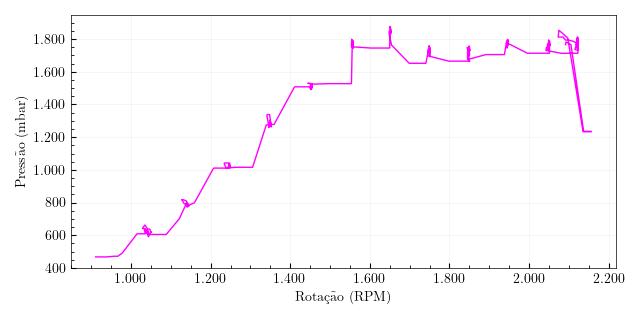

In [17]:
fig, ax = plt.subplots(figsize=(16*cm, 8*cm))

ax.plot(ROTACAO, PRESSAO)
ax.set_xlabel('Rotação (RPM)')
ax.set_ylabel('Pressão (mbar)')

fig.tight_layout()


### 2.2 Torque $\times$ rotação

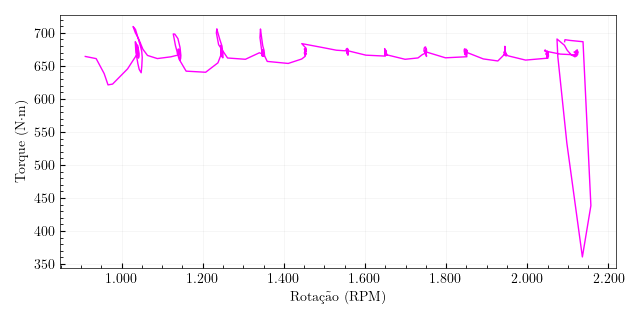

In [18]:
fig, ax = plt.subplots(figsize=(16*cm, 8*cm))

ax.plot(ROTACAO, TORQUE_NOMINAL)
ax.set_xlabel('Rotação (RPM)')
ax.set_ylabel('Torque (N$\cdot$m)')

fig.tight_layout()


### 2.3 Potência $\times$ rotação

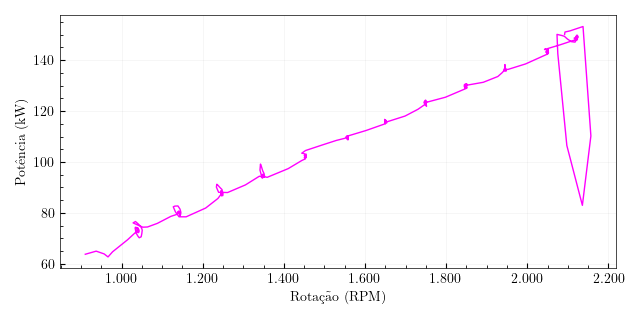

In [19]:
fig, ax = plt.subplots(figsize=(16*cm, 8*cm))
t = np.linspace(0,len(ROTACAO),len(ROTACAO))
ax.plot(ROTACAO, POTENCIA)
ax.set_xlabel('Rotação (RPM)')
ax.set_ylabel('Potência (kW)')

fig.tight_layout()


### 2.4 Carga lateral do pistão $\times$ rotação
- considerando ângulo de 90o e PME

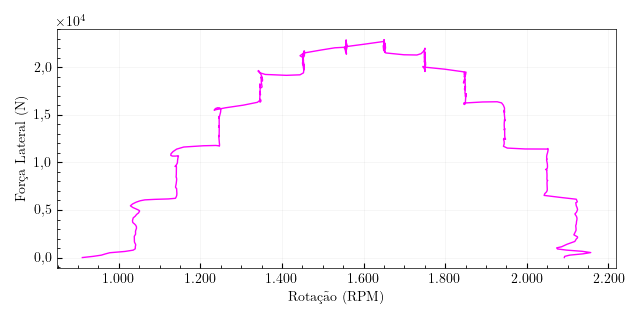

In [20]:
def forca_lateral(P, D, RL, alpha):
    n = np.pi * P * D * RL * np.sin(np.deg2rad(alpha))
    d = 4 * np.sqrt(1 - RL**2 * (np.sin(alpha))**2)
    return n/d

alpha = np.linspace(0,180,549)
forca = forca_lateral(1e6, 0.1, 0.28, alpha)

fig, ax = plt.subplots(figsize=(16*cm, 8*cm))
ax.plot(ROTACAO, forca)
ax.set_xlabel('Rotação (RPM)')
ax.set_ylabel('Força Lateral (N)')

fig.tight_layout()


### 2.5 Velocidade

#### 2.5.1 Velocidade média $\times$ rotação

#### 2.5.2 Velocidade máxima $\times$ rotação

#### 2.5.3 Velocidade máxima com torque máximo

#### 2.5.4 Velocidade máxima com potência máximo

### 2.6 Comportamento da pressão de Boost (admissão) $\times$ rotação
- verificar influência da pressão de Boost

###  2.7 Índice de mach na válvula de admissão em condição de potência e torque máximo

####  2.7.1 Índice de mach com potência máxima

####  2.7.2 Índice de mach com torque máxima